![avatar](images/line_regression.png)
平面上的很多点是按照某种规律生成的，对于上图中的点，我们观察发现这些点都集中分布在一条直线上，直线的公式y=w*x+b,w是直线的斜率，b是偏置量。那么，根据这些点的分布，怎样才能找到对应的w,b的值呢？

In [1]:
import numpy as np
import matplotlib.pyplot as plt

下面，我们利用numpy生成一些(x,y)的点，假装不知道这些点是如何生成的，开启寻找规律的旅程。

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203 ]
[5.74406752 6.57594683 6.01381688 5.72441591 5.118274   6.22947057
 5.18793606 7.458865   7.8183138  4.91720759 6.95862519 5.6444746
 5.84022281 7.62798319 3.35518029 3.4356465  3.10109199 7.16309923
 6.89078375 7.35006074 7.89309171 6.99579282 5.30739681 6.90264588
 3.59137213 6.19960511 3.71676644 7.72334459 5.60924161 5.0733097
 4.32277806 6.87116845 5.28075166 5.84216974 3.093949   6.08817749
 6.06047861 6.08466998 7.71874039 6.4091015 ]


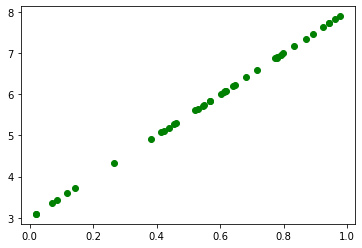

In [2]:
np.random.seed(0) #为了让重复执行时结果保持不变，需要指定个随机数，后续生成随机数相关的操作就会保持一致。

w,b=5,3
x=np.random.rand(40)
y = w*x + b
plt.plot(x, y, 'o', color='green')
print(x)
print(y)

假设一开始我们不知道w,b, 只有这么多组(x,y)的向量，应该怎么确定w,b?

首先，我们随便选取一组(w,b)作为初始值, 根据直线的公式，根据对应x值可以计算出在这组随机的(w,b)情况y的值是多少，我们设定这个叫predict_y.我们计算出predict_y和实际的y值的差值是多少，差值越少，说明我们假设的w,b值越接近真实值。

问题1，如何衡量predict_y和实际的y值的差值呢？有两种方式：
1.怎么计算预测的y值和实际的y值差别？abs(predict_y-y) 平均绝对误差（MAE），(predict_y-y)**2. 均方误差损失函数（MSE）。
![avatar](images/mse.png)

问题2. 怎么调整w,b值？
求导理论(待补充)

((w*x + b)-y)***2 = 0, 求导 w*x+b-y, w的偏导数=(w**x+b-y)*x, b的偏导数=(w**x+b-y)*1

In [3]:
learning_rate = 0.05

w1,b1 = np.random.randint(0,10,2)
print("w1,b1:", w1,b1)

def forward(x):  
    '''定义模型'''
    return w1*x+b1

def loss(x,y):
    '''损失函数'''
    return np.sum((forward(x)-y)**2)/2

def back(w1,b1,x,y): 
    """更新w,b参数"""
    predict_y = forward(x)
    gradient = (predict_y-y)
    tmp_w = w1 - learning_rate * np.sum(gradient * x) / x.shape[0]
    tmp_b = b1 - learning_rate * np.mean(gradient * 1)  # sum/count 等价于mean
    return tmp_w,tmp_b

print(x.shape)
w1,b1 = back(w1,b1,x,y)
error = loss(x,y) 
print("w1:%.3f,b1:%.3f,error:%.3f"%(w1,b1,error))

w1,b1: 8 1
(40,)
w1:7.997,b1:1.014,error:14.721


In [4]:
w1,b1 = 15.0,30.0
learning_rate = 0.06
print("w1,b1:", w1,b1)

for i in range(500):
    w1,b1 = back(w1,b1,x,y) 
    error = loss(x,y)
    print("w1:%.3f,b1:%.3f,error:%.3f"%(w1,b1,error))
        
error = loss(x,y) 
print("w1:%.3f,b1:%.3f,error:%.3f"%(w1,b1,error))
    

w1,b1: 15.0 30.0
w1:13.826,b1:28.035,error:18245.026
w1:12.749,b1:26.229,error:15414.940
w1:11.760,b1:24.568,error:13024.571
w1:10.852,b1:23.041,error:11005.594
w1:10.019,b1:21.636,error:9300.301
w1:9.255,b1:20.345,error:7859.950
w1:8.553,b1:19.158,error:6643.375
w1:7.910,b1:18.066,error:5615.804
w1:7.320,b1:17.061,error:4747.870
w1:6.779,b1:16.138,error:4014.768
w1:6.282,b1:15.288,error:3395.548
w1:5.828,b1:14.507,error:2872.513
w1:5.411,b1:13.788,error:2430.720
w1:5.029,b1:13.126,error:2057.543
w1:4.679,b1:12.518,error:1742.323
w1:4.358,b1:11.958,error:1476.053
w1:4.065,b1:11.442,error:1251.128
w1:3.797,b1:10.968,error:1061.123
w1:3.551,b1:10.532,error:900.612
w1:3.327,b1:10.130,error:765.014
w1:3.121,b1:9.760,error:650.457
w1:2.934,b1:9.419,error:553.671
w1:2.763,b1:9.105,error:471.897
w1:2.606,b1:8.816,error:402.800
w1:2.464,b1:8.549,error:344.413
w1:2.334,b1:8.304,error:295.070
w1:2.216,b1:8.077,error:253.366
w1:2.109,b1:7.869,error:218.116
w1:2.011,b1:7.676,error:188.315
w1:1.922

### 接下来，我们使用目前比较流行的深度学习框架pytorch来实现上面同样的逻辑

In [11]:
import torch
import torch.nn as nn

m = nn.Linear(1, 1)  # y = w*x + b 的封装，实际上这个可以实现n元线性方程，y=w0*1 + w1*x1 + w2*x2 + .. + wn*xn,用矩阵表示:Y=W*X
# print(m.weight,m.bias) # 系统会随机给定weight和bias, 如果要每次执行都一样的初始值，可以设定 torch.manual_seed(0)

print(x.shape,y.shape)
# inX = torch.from_numpy(x).unsqueeze(1) #from_numpy不能修改数据类型？
# outY = torch.from_numpy(y).unsqueeze(1)
inX = torch.as_tensor(x,dtype=torch.float32).unsqueeze(1)
outY = torch.as_tensor(y,dtype=torch.float32).unsqueeze(1)
# print(inX,inX.shape)

predict_Y = m(inX)
print(predict_Y)

# .reshape(-1,1) -> .unsqueeze(1)
# inX = torch.as_tensor(x,dtype=torch.float32) #将numpy转成tensor
# outY = torch.as_tensor(y,dtype=torch.float32).reshape(-1,1)
# print(inX.shape)
# print(inX)
# inX = torch.reshape(inX, (-1,1)) #将shape从 [1,40]转成[40,1]
# print(inX,inX.shape)

(40,) (40,)
tensor([[-0.4022],
        [-0.3292],
        [-0.3785],
        [-0.4039],
        [-0.4571],
        [-0.3596],
        [-0.4510],
        [-0.2517],
        [-0.2202],
        [-0.4748],
        [-0.2956],
        [-0.4109],
        [-0.3938],
        [-0.2369],
        [-0.6118],
        [-0.6048],
        [-0.6341],
        [-0.2777],
        [-0.3016],
        [-0.2613],
        [-0.2136],
        [-0.2924],
        [-0.4405],
        [-0.3005],
        [-0.5911],
        [-0.3622],
        [-0.5801],
        [-0.2285],
        [-0.4140],
        [-0.4611],
        [-0.5269],
        [-0.3033],
        [-0.4429],
        [-0.3936],
        [-0.6347],
        [-0.3720],
        [-0.3744],
        [-0.3723],
        [-0.2289],
        [-0.3438]], grad_fn=<AddmmBackward>)


In [6]:
# 创建一个线性回归的模型
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim,bias=True)  

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegressionModel(1, 1) #模型初始化
criterion = nn.MSELoss() #定义损失函数：均方误差
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) #定义最优化算法

#常见的几种最优化算法?
for epoch in range(500):  #迭代次数
    optimizer.zero_grad() #清理模型里参数的梯度值
    predict_Y = model(inX) #根据输入获得当前参数下的输出值
    loss = criterion(predict_Y, outY) #计算误差
    loss.backward() #反向传播，计算梯度，
    optimizer.step() #更新模型参数
    print('epoch {}, loss {}'.format(epoch, loss.item()))

predict_Y = model(inX)
print(predict_Y)

for name,p in model.named_parameters():
    print(p)

epoch 0, loss 33.63819122314453
epoch 1, loss 23.778167724609375
epoch 2, loss 16.85102081298828
epoch 3, loss 11.983793258666992
epoch 4, loss 8.563364028930664
epoch 5, loss 6.159113883972168
epoch 6, loss 4.468597412109375
epoch 7, loss 3.2793936729431152
epoch 8, loss 2.4423093795776367
epoch 9, loss 1.8525581359863281
epoch 10, loss 1.4365441799163818
epoch 11, loss 1.1425782442092896
epoch 12, loss 0.9343550801277161
epoch 13, loss 0.7863761186599731
epoch 14, loss 0.6807320713996887
epoch 15, loss 0.604844331741333
epoch 16, loss 0.5498780012130737
epoch 17, loss 0.5096278190612793
epoch 18, loss 0.47973519563674927
epoch 19, loss 0.4571380615234375
epoch 20, loss 0.43968629837036133
epoch 21, loss 0.42586904764175415
epoch 22, loss 0.4146248400211334
epoch 23, loss 0.4052082598209381
epoch 24, loss 0.3970951437950134
epoch 25, loss 0.3899172842502594
epoch 26, loss 0.38341575860977173
epoch 27, loss 0.3774084448814392
epoch 28, loss 0.3717673718929291
epoch 29, loss 0.366401970

epoch 378, loss 0.003596179187297821
epoch 379, loss 0.003548887325450778
epoch 380, loss 0.00350220431573689
epoch 381, loss 0.0034561436623334885
epoch 382, loss 0.0034106853418052197
epoch 383, loss 0.0033658319152891636
epoch 384, loss 0.0033215670846402645
epoch 385, loss 0.0032778754830360413
epoch 386, loss 0.0032347559463232756
epoch 387, loss 0.0031922131311148405
epoch 388, loss 0.0031502177007496357
epoch 389, loss 0.0031087840907275677
epoch 390, loss 0.0030678967013955116
epoch 391, loss 0.0030275399331003428
epoch 392, loss 0.0029877235647290945
epoch 393, loss 0.0029484278056770563
epoch 394, loss 0.0029096510261297226
epoch 395, loss 0.002871372504159808
epoch 396, loss 0.0028336052782833576
epoch 397, loss 0.0027963335160166025
epoch 398, loss 0.002759553026407957
epoch 399, loss 0.002723255194723606
epoch 400, loss 0.0026874386239796877
epoch 401, loss 0.0026520933024585247
epoch 402, loss 0.0026172087527811527
epoch 403, loss 0.002582796383649111
epoch 404, loss 0.00

至此，根据一些点找到直线上的w,b已经完成。对于复杂一些的分布规律，该如何搞呢？

常见的几种最优化算法，https://pytorch.org/docs/master/optim.html

![常见优化算法](https://ai-studio-static-online.cdn.bcebos.com/f4cf80f95424411a85ad74998433317e721f56ddb4f64e6f8a28a27b6a1baa6b)

1. 随机梯度，Stochastic Gradient Descent,SGD
    * 随机批量梯度，Batch Gradient Descent,BGD
2. 动量 Momentum, 引入物理“动量”的概念，累积速度，减少震荡，使参数更新的方向更稳定
3. AdaGrad,根据不同参数距离最优解的远近，动态调整学习率。学习率逐渐下降，依据各参数变化大小调整学习率
4. Adam, 由于动量和自适应学习率两个优化思路是正交的，因此可以将两个思路结合起来，这就是当前广泛应用的算法。